# Analysis of CIA Factbook Data

In this guided project by Dataquest (DQ), I analyzed a data set from the [CIA World Factbook](https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. I downloaded the SQLite database `factbook.db` from a [GitHub  repository](https://github.com/factbook/factbook.sql/releases).

My goals in this project are the following:

* Explore the data set and determine the columns that provide demographic information
* Provide summary statistics, e.g. maximum and minimum values, to demographic parameters
* Explore some of the outliers in the data set
* Graphically summarize the distribution of these demographic parameters

## Exploration

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


The database shows 2 tables: `facts` and `sqlite_sequence`.  I proceeded by returning the first 5 rows of the `facts` table.

In [2]:
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


The columns `created_at` and `updated_at` suggest that the presented data is for the year 2015. I worked with the following data columns:

* `name` - The name of the country
* `area` - The total land and sea area of the country
* `area_land` - The country's land area in km<sup>2</sup>
* `area_water` - The country's water area in km<sup>2</sup>
* `population` - The country's population
* `birth_rate` - The country's birth rate is the number of births a year per 1,000 people
* `death_rate` - The country's death rate is the number of deaths a year per 1,000 people

## Summary Statistics

In [3]:
q3 = '''
SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth), 
MIN(birth_rate), MAX(birth_rate), MIN(death_rate), MAX(death_rate)
FROM facts
'''
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth),MIN(birth_rate),MAX(birth_rate),MIN(death_rate),MAX(death_rate)
0,0,7256490011,0.0,4.02,6.65,45.45,1.53,14.89


I observed from the results that there is a country with a population of `0` and another country with a population of `7256490011` (7.2 billion people).

## Exploring Outliers

I zoomed on the entries of the data set where the population is `0` and `7256490011`.

In [4]:
q4 = 'SELECT * FROM facts WHERE population = 0'
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [5]:
q5 = 'SELECT * FROM facts WHERE population = 7256490011'
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Results show that the data set contains an entry for Antarctica which has the population of `0`. This agrees with the [CIA Factbook page for Antarctica](https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html). The row with the population of `7256490011` is for the whole world. 

## Distributions of Population, Population Growth, Birth Rate, and Death Rate

I generated histograms to summarize the distribution of population, population growth, birth rate, and death rates of countries while ignoring the rows of Antarctica and the whole world in the data set.

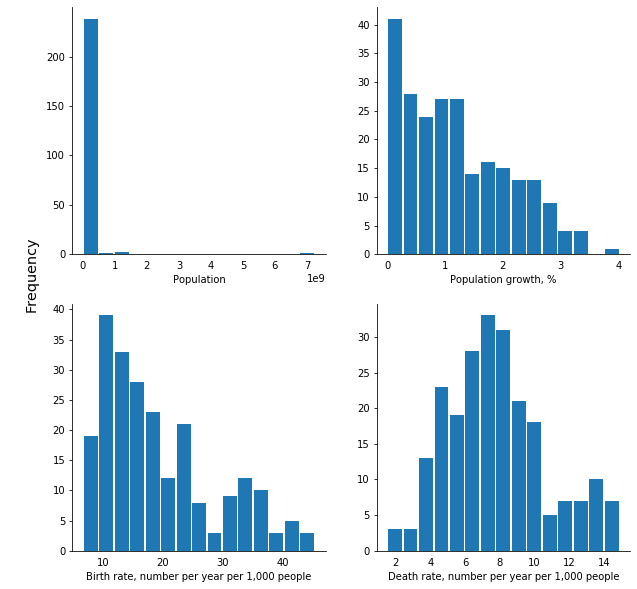

In [6]:
q6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != 0 OR population != 7256490011
'''
df = pd.read_sql_query(q6, conn)
col = ['population', 'population_growth', 'birth_rate', 'death_rate']
label = ['Population', 'Population growth, %', 'Birth rate, number per year per 1,000 people', 'Death rate, number per year per 1,000 people']

import matplotlib.pyplot as plt
import warnings
%matplotlib inline

fig, axs = plt.subplots(2,2, figsize=(10, 10))

axs = axs.ravel()
warnings.filterwarnings("ignore")

for i in range(4):
    
    axs[i].hist(df[col[i]], bins = 15, rwidth=0.9)
    axs[i].set_xlabel(label[i], size='medium')
    axs[i].tick_params(top=False, right=False, bottom=False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    
plt.annotate('Frequency', xy=(25,280), xycoords='figure pixels', rotation='vertical', size='x-large')
plt.savefig('histograms.pdf')
plt.show()


I observed the following from the distributions of selected demographic parameters:

* The majority of the countries have a population of not more than 500 million.
* The majority of the countries have a population growth of 3% and less.
* Most countries have a birth rate of 25 births per year per 1,000 people and less.
* The death rate of most countries falls from 3 - 10 deaths per year per 1,000 people.

## Population Density and Its Distribution

[Population density](https://www.thoughtco.com/population-density-overview-1435467) is defined as the number of people per unit area. It is a common statistic that describes the disbursement of a population across the land. I calculated the population density from the ratio of the `population` column with the `area_land` column.

In [7]:
q7 = '''
SELECT name, population, area_land, ROUND(CAST(population AS Float) / CAST(area_land AS Float), 1) 'population_density' 
FROM facts
WHERE population != 0 AND population != 7256490011
ORDER BY population_density DESC
'''
df2 = pd.read_sql_query(q7, conn)
print(df2[:11])

          name  population  area_land  population_density
0        Macau      592731       28.0             21169.0
1       Monaco       30535        2.0             15267.5
2    Singapore     5674472      687.0              8259.8
3    Hong Kong     7141106     1073.0              6655.3
4   Gaza Strip     1869055      360.0              5191.8
5    Gibraltar       29258        6.0              4876.3
6      Bahrain     1346613      760.0              1771.9
7     Maldives      393253      298.0              1319.6
8        Malta      413965      316.0              1310.0
9      Bermuda       70196       54.0              1299.9
10  Bangladesh   168957745   130170.0              1298.0


The sorted results show the following countries to be the most densely populated in 2015: Macau, Monaco, Singapore, Hong Kong, Gaza, Gibraltar, Bahrain, Maldives, Malta, Bermuda, and Bangladesh. In 2017-2018, the same countries remain to be the most densely populated according to the [World Bank](https://data.worldbank.org/indicator/EN.POP.DNST?end=2018&most_recent_value_desc=true&start=2018&view=bar).

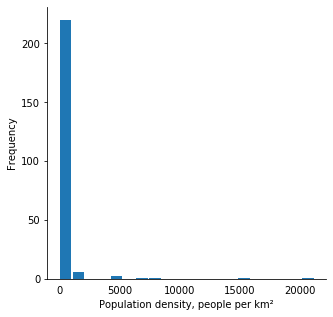

In [8]:
fig, axs = plt.subplots(1,1, figsize=(5, 5))
axs.hist(df2['population_density'], bins = 20, rwidth=0.9)
axs.set_xlabel('Population density, people per km\u00b2', size='medium')
axs.set_ylabel('Frequency', size='medium')
axs.tick_params(top=False, right=False, bottom=False)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

plt.show()

The distribution of population density shows that the majority of the countries have a population density of 2,000 people per km<sup>2</sup> and less.

## Countries with More Water than Land

I also determined the countries that have the highest ratios of water to land using the columns `area_water` and `area_land` in the data set. Results show the British Indian Ocean Territory and the Virgin Islands have more water than land.

In [9]:
q8 = '''
SELECT name, area_water, area_land, ROUND(CAST(area_water AS Float) / CAST(area_land AS Float), 1) 'water_to_land_ratio' 
FROM facts
ORDER BY water_to_land_ratio DESC
LIMIT 11
'''
pd.read_sql_query(q8, conn)

,name,area_water,area_land,water_to_land_ratio
0,British Indian Ocean Territory,54340,60,905.7
1,Virgin Islands,1564,346,4.5
2,Puerto Rico,4921,8870,0.6
3,"Bahamas, The",3870,10010,0.4
4,Guinea-Bissau,8005,28120,0.3
5,Malawi,24404,94080,0.3
6,Eritrea,16600,101000,0.2
7,Liberia,15049,96320,0.2
8,Netherlands,7650,33893,0.2
9,Uganda,43938,197100,0.2


## Conclusion

I conclude the following from my analysis of the 2015 CIA  factbook data:

* The majority of the countries have a population of not more than 500 million.
* The majority of the countries have a population growth of 3% and less.
* Most countries have a birth rate of 25 births per year per 1,000 people and less.
* The death rate of most countries falls from 3 - 10 deaths per year per 1,000 people.
* Macau is the most densely populated country at 21,169 people per km<sup>2</sup>.
* The majority of the countries have a population density of 2,000 people per km2 and less.
* Only 2 countries have more water area than land: British Indian Ocean Territory and the Virgin Islands.